In [23]:
import gdown
import pandas as pd

file_id = "1p-SskbgyiVOWX8ZgLnpY8do6NXbEFgiT"

url = f"https://drive.google.com/uc?export=download&id={file_id}"
excel_file = "labourdemandbyoccupation.xlsx"
gdown.download(url, excel_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1p-SskbgyiVOWX8ZgLnpY8do6NXbEFgiT
From (redirected): https://drive.google.com/uc?export=download&id=1p-SskbgyiVOWX8ZgLnpY8do6NXbEFgiT&confirm=t&uuid=f9c6c400-7501-4c45-82ae-469c789a801e
To: /content/labourdemandbyoccupation.xlsx
100%|██████████| 46.7M/46.7M [00:00<00:00, 75.3MB/s]


'labourdemandbyoccupation.xlsx'

In [24]:
xls = pd.ExcelFile(excel_file)

sheet_names = xls.sheet_names
print("Sheets in the Excel file:")
for name in sheet_names:
    print("-", name)

Sheets in the Excel file:
- Cover sheet
- Table of contents
- Notes
- Table 1
- Table 2
- Table 3
- Table 4
- Table 5
- Table 6
- Table 7


In [25]:
table_sheets = [s for s in xls.sheet_names if s.startswith("Table")]

for sheet in table_sheets:
    print("\n" + "="*60)
    print(f"Loading sheet: {sheet}")
    print("="*60)

    # Row 5 is header -> index 4 (0-based)
    df = pd.read_excel(
        excel_file,
        sheet_name=sheet,
        header=4
    )

    # Drop fully empty rows
    df = df.dropna(how="all")

    # Show headers
    print("\nColumns:")
    print(df.columns.tolist())

    # Show dataframe info
    print("\nDataFrame info:")
    df.info()


Loading sheet: Table of contents

Columns:
['Table 2', 'New online job adverts in the UK, split by Local Authority District between January 2017 and November 2025', 'Textkernel']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                      --------------  ----- 
 0   Table 2                                                                                                     5 non-null      object
 1   New online job adverts in the UK, split by Local Authority District between January 2017 and November 2025  5 non-null      object
 2   Textkernel                                                                                                  3 non-null      object
dtypes: object(3)
memor

In [33]:
# Load Table 1
df_table1 = (
    pd.read_excel(excel_file, sheet_name="Table 1", header=4)
      .dropna(how="all")
)

# Load Table 2
df_table2 = (
    pd.read_excel(excel_file, sheet_name="Table 2", header=4)
      .dropna(how="all")
)

# Load Table 3
df_table3 = (
    pd.read_excel(excel_file, sheet_name="Table 3", header=4)
      .dropna(how="all")
)

# Load Table 4
df_table4 = (
    pd.read_excel(excel_file, sheet_name="Table 4", header=4)
      .dropna(how="all")
)

# Load Table 5
df_table5 = (
    pd.read_excel(excel_file, sheet_name="Table 5", header=4)
      .dropna(how="all")
)

# Load Table 6
df_table6 = (
    pd.read_excel(excel_file, sheet_name="Table 6", header=4)
      .dropna(how="all")
)

# Load Table 7
df_table7 = (
    pd.read_excel(excel_file, sheet_name="Table 7", header=4)
      .dropna(how="all")
)

### Table 1

In [26]:
df_table1["Country"].unique()

['Total UK', 'England', 'Scotland', 'Wales', 'Northern Ireland', 'Unknown']
Categories (6, object): ['England', 'Northern Ireland', 'Scotland', 'Total UK', 'Unknown', 'Wales']

<Axes: title={'center': 'UK job adverts over time'}>

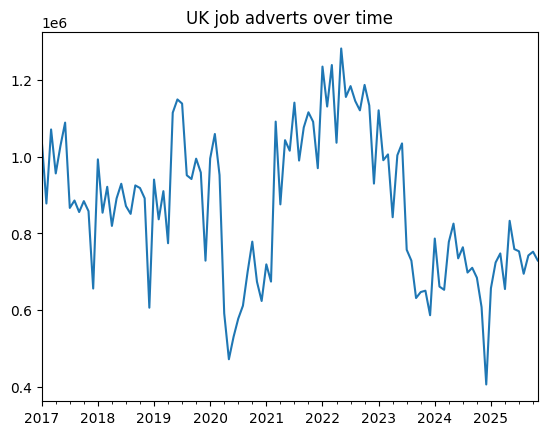

In [27]:
df_table1["Country"] = df_table1["Country"].astype("category")

uk_series = (
    df_table1[df_table1["Country"] == "Total UK"]
    .iloc[0, 1:]
)

uk_series.index = pd.to_datetime(uk_series.index, format="%b-%y")

uk_series = pd.to_numeric(uk_series)

uk_series.plot(title="UK job adverts over time")

### Table 2

In [28]:
id_cols = [
    "Region", "ITL2",
    "Local Authority District",
    "Local Authority Code"
]

for col in id_cols:
    df_table2[col] = df_table2[col].astype("category")

In [29]:
lad_totals = df_table2.iloc[:, 4:].select_dtypes(include="number").sum(axis=1)

df_table2.assign(total=lad_totals) \
         .sort_values("total", ascending=False) \
         [["Local Authority District", "total"]].head(10)

,Local Authority District,total
80,London,18997148
100,Manchester,2324352
307,Birmingham,2129825
251,"Bristol, City of",1575968
327,Leeds,1491264
166,Glasgow City,909121
140,City of Edinburgh,903901
14,Nottingham,831902
51,Cambridge,826406
318,North Yorkshire,770588


### Table 3

In [30]:
df_table3["Region"] = df_table3["Region"].astype("category")
df_table3["SOC 4 digit code"] = df_table3["SOC 4 digit code"].astype("category")
df_table3["SOC 4 digit label"] = df_table3["SOC 4 digit label"].astype("category")

In [31]:
soc_totals = (
    df_table3.iloc[:, 3:]
    .select_dtypes(include="number")
    .sum(axis=1)
)

df_table3.assign(total=soc_totals) \
         .groupby("SOC 4 digit label")["total"] \
         .sum() \
         .sort_values(ascending=False) \
         .head(10)


/tmp/ipython-input-799551773.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("SOC 4 digit label")["total"] \


,total
SOC 4 digit label,
Programmers and software development professionals,5240775
Care workers and home carers,4137282
"Book-keepers, payroll managers and wages clerks",3819743
Sales accounts and business development managers,3714855
Other registered nursing professionals,2996642
Business sales executives,2993740
Other administrative occupations n.e.c.,2929259
IT user support technicians,2709717
Customer service occupations n.e.c.,2558976


### Table 4

In [34]:
cat_cols = [
    "Region", "ITL2",
    "Local Authority District",
    "Local Authority Code",
    "SOC 3 digit code",
    "SOC 3 digit label"
]

for col in cat_cols:
    df_table4[col] = df_table4[col].astype("category")

In [36]:
numeric_cols = df_table4.iloc[:, 6:].apply(pd.to_numeric, errors='coerce')
soc3_totals = numeric_cols.sum(axis=1)
df_table4.assign(total=soc3_totals) \
         .groupby("SOC 3 digit label")["total"] \
         .sum() \
         .sort_values(ascending=False) \
         .head(10)

/tmp/ipython-input-4170249500.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("SOC 3 digit label")["total"] \


,total
SOC 3 digit label,
Information Technology Professionals,5571859.0
"Sales, Marketing and Related Associate Professionals",5160343.0
Caring Personal Services,4052637.0
Administrative Occupations: Finance,2992143.0
Teaching Professionals,2618407.0
Nursing Professionals,2497288.0
Other Elementary Services Occupations,2407676.0
"HR, Training and Other Vocational Associate Guidance Professionals",2349716.0
Functional Managers and Directors,2323231.0


### Table 5

In [37]:
quarter_cols = df_table5.columns[6:]

for col in quarter_cols:
    df_table5[col] = pd.to_numeric(df_table5[col], errors="coerce")


In [38]:
cat_cols = [
    "Region", "ITL2",
    "Local Authority District",
    "Local Authority Code",
    "SOC 4 digit code",
    "SOC 4 digit label"
]

for col in cat_cols:
    df_table5[col] = df_table5[col].astype("category")

<Axes: title={'center': 'Total job adverts (quarterly)'}>

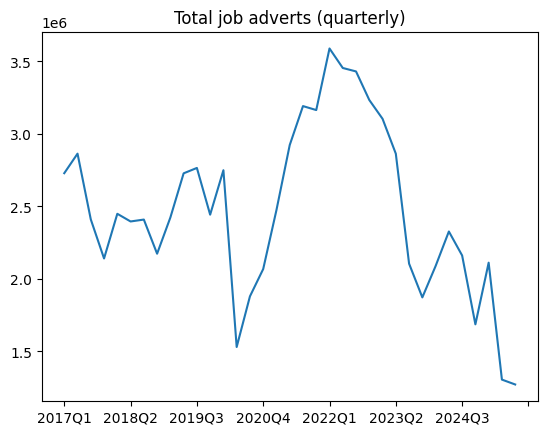

In [39]:
# Quarterly trend
quarter_totals = df_table5.iloc[:, 6:].sum()
quarter_totals.plot(title="Total job adverts (quarterly)")

### Table 6

In [40]:
for col in df_table6.columns:
    df_table6[col] = df_table6[col].astype("category")

In [41]:
df_table6["Mayoral Combined Authority"].value_counts()

,count
Mayoral Combined Authority,
East Midlands,17
Greater Manchester,10
North East,7
West Midlands,7
Cambridgeshire and Peterborough,6
Liverpool City Region,6
Tees Valley,5
West Yorkshire,5
South Yorkshire,4


### Table 7

In [44]:
df_table7 = df_table7.dropna(axis=1, how="all")

df_table7.columns = [
    "LSIP_pre_2025",
    "Local Authority Code_pre",
    "Local Authority_pre",
    "LSIP_post_2025",
    "Local Authority Code_post",
    "Local Authority_post",
    "Other_Column"
]

In [45]:
df_table7["LSIP_pre_2025"].value_counts().head(10)

,count
LSIP_pre_2025,
E06000065,1
Local Authority Code 2023,1
E06000043,1
E07000061,1
E07000062,1
E07000063,1
E07000064,1
E07000065,1
E07000223,1


### Questions

## Prepare Time-Series Data for Analysis


In [47]:
import pandas as pd

# For df_table2
# Identify monthly columns (starting from the 5th column, index 4)
monthly_cols_df2 = df_table2.columns[4:]

# Convert values to numeric
for col in monthly_cols_df2:
    df_table2[col] = pd.to_numeric(df_table2[col], errors='coerce')

# Convert column names to datetime objects
new_cols_df2 = pd.to_datetime(monthly_cols_df2, format='%b-%y')
df_table2.columns = list(df_table2.columns[:4]) + list(new_cols_df2)


# For df_table3
# Identify monthly columns (starting from the 4th column, index 3)
monthly_cols_df3 = df_table3.columns[3:]

# Convert values to numeric
for col in monthly_cols_df3:
    df_table3[col] = pd.to_numeric(df_table3[col], errors='coerce')

# Convert column names to datetime objects
new_cols_df3 = pd.to_datetime(monthly_cols_df3, format='%b-%y')
df_table3.columns = list(df_table3.columns[:3]) + list(new_cols_df3)


# For df_table4
# Identify monthly columns (starting from the 7th column, index 6)
monthly_cols_df4 = df_table4.columns[6:]

# Convert values to numeric
for col in monthly_cols_df4:
    df_table4[col] = pd.to_numeric(df_table4[col], errors='coerce')

# Convert column names to datetime objects
new_cols_df4 = pd.to_datetime(monthly_cols_df4, format='%b-%y')
df_table4.columns = list(df_table4.columns[:6]) + list(new_cols_df4)

print("df_table2 columns after transformation:")
print(df_table2.columns)
print("\ndf_table3 columns after transformation:")
print(df_table3.columns)
print("\ndf_table4 columns after transformation:")
print(df_table4.columns)

df_table2 columns after transformation:
Index([                  'Region',                     'ITL2',
       'Local Authority District',     'Local Authority Code',
              2017-01-01 00:00:00,        2017-02-01 00:00:00,
              2017-03-01 00:00:00,        2017-04-01 00:00:00,
              2017-05-01 00:00:00,        2017-06-01 00:00:00,
       ...
              2025-02-01 00:00:00,        2025-03-01 00:00:00,
              2025-04-01 00:00:00,        2025-05-01 00:00:00,
              2025-06-01 00:00:00,        2025-07-01 00:00:00,
              2025-08-01 00:00:00,        2025-09-01 00:00:00,
              2025-10-01 00:00:00,        2025-11-01 00:00:00],
      dtype='object', length=111)

df_table3 columns after transformation:
Index([           'Region',  'SOC 4 digit code', 'SOC 4 digit label',
       2017-01-01 00:00:00, 2017-02-01 00:00:00, 2017-03-01 00:00:00,
       2017-04-01 00:00:00, 2017-05-01 00:00:00, 2017-06-01 00:00:00,
       2017-07-01 00:00:00,
     

In [48]:
import pandas as pd

# For df_table5
# Identify quarterly columns (starting from the 7th column, index 6)
quarterly_cols_df5 = df_table5.columns[6:]

# Convert column names to datetime objects representing the start of the quarter
new_cols_df5 = pd.PeriodIndex(quarterly_cols_df5, freq='Q').to_timestamp()
df_table5.columns = list(df_table5.columns[:6]) + list(new_cols_df5)

print("df_table5 columns after transformation:")
print(df_table5.columns)

df_table5 columns after transformation:
Index([                  'Region',                     'ITL2',
       'Local Authority District',         'SOC 4 digit code',
              'SOC 4 digit label',     'Local Authority Code',
              2017-01-01 00:00:00,        2017-04-01 00:00:00,
              2017-07-01 00:00:00,        2017-10-01 00:00:00,
              2018-01-01 00:00:00,        2018-04-01 00:00:00,
              2018-07-01 00:00:00,        2018-10-01 00:00:00,
              2019-01-01 00:00:00,        2019-04-01 00:00:00,
              2019-07-01 00:00:00,        2019-10-01 00:00:00,
              2020-01-01 00:00:00,        2020-04-01 00:00:00,
              2020-07-01 00:00:00,        2020-10-01 00:00:00,
              2021-01-01 00:00:00,        2021-04-01 00:00:00,
              2021-07-01 00:00:00,        2021-10-01 00:00:00,
              2022-01-01 00:00:00,        2022-04-01 00:00:00,
              2022-07-01 00:00:00,        2022-10-01 00:00:00,
              2

## Analyze Overall UK Job Demand Trends



### Visualize Overall UK Job Demand Trends


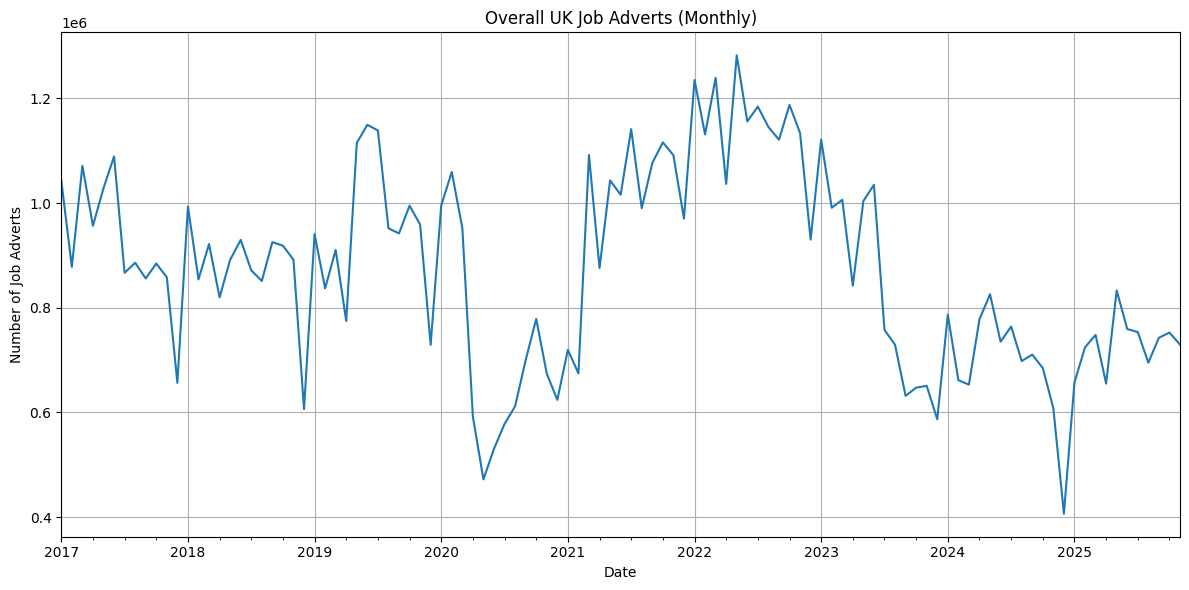

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
uk_series.plot(kind='line')
plt.title('Overall UK Job Adverts (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Job Adverts')
plt.grid(True)
plt.tight_layout()
plt.show()

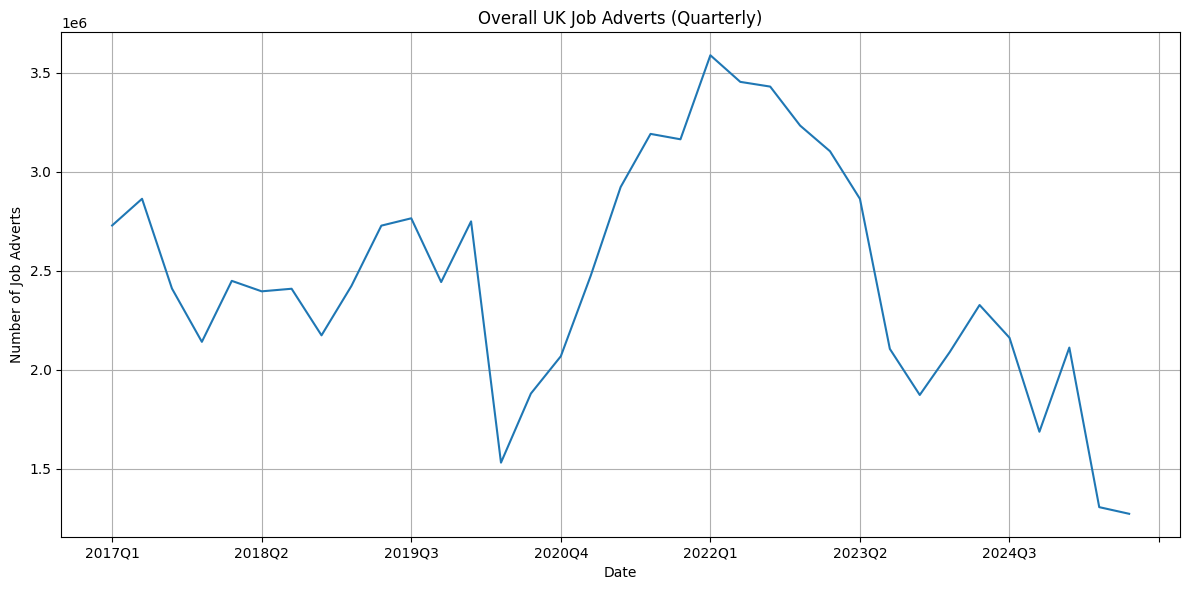

In [50]:
plt.figure(figsize=(12, 6))
quarter_totals.plot(kind='line')
plt.title('Overall UK Job Adverts (Quarterly)')
plt.xlabel('Date')
plt.ylabel('Number of Job Adverts')
plt.grid(True)
plt.tight_layout()
plt.show()

## Identify High-Demand Regions (Geography & Remote Work)

In [51]:
import matplotlib.pyplot as plt

# Identify time-series columns (datetime objects)
time_series_cols_df2 = df_table2.select_dtypes(include=['datetime64[ns]']).columns

# Calculate the sum of job adverts for each Local Authority District
df_table2['total_adverts'] = df_table2[time_series_cols_df2].sum(axis=1)

# Sort by 'total_adverts' in descending order and select the top 10
top_10_districts = df_table2.sort_values(by='total_adverts', ascending=False).head(10)

print("Top 10 Local Authority Districts by Total Job Adverts:")
print(top_10_districts[['Local Authority District', 'total_adverts']])

Top 10 Local Authority Districts by Total Job Adverts:
    Local Authority District  total_adverts
328                Wakefield            0.0
0               Amber Valley            0.0
1                   Ashfield            0.0
2                  Bassetlaw            0.0
3                   Bolsover            0.0
4                   Broxtowe            0.0
5               Chesterfield            0.0
6                      Derby            0.0
7           Derbyshire Dales            0.0
312                  Walsall            0.0


/tmp/ipython-input-2683606125.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_table2['total_adverts'] = df_table2[time_series_cols_df2].sum(axis=1)


Top 10 Local Authority Districts by Total Job Adverts:
    Local Authority District  total_adverts
80                    London     19260161.0
100               Manchester      2363386.0
307               Birmingham      2164638.0
251         Bristol, City of      1604395.0
327                    Leeds      1520293.0
166             Glasgow City       929957.0
140        City of Edinburgh       918676.0
14                Nottingham       849632.0
51                 Cambridge       837088.0
318          North Yorkshire       783177.0


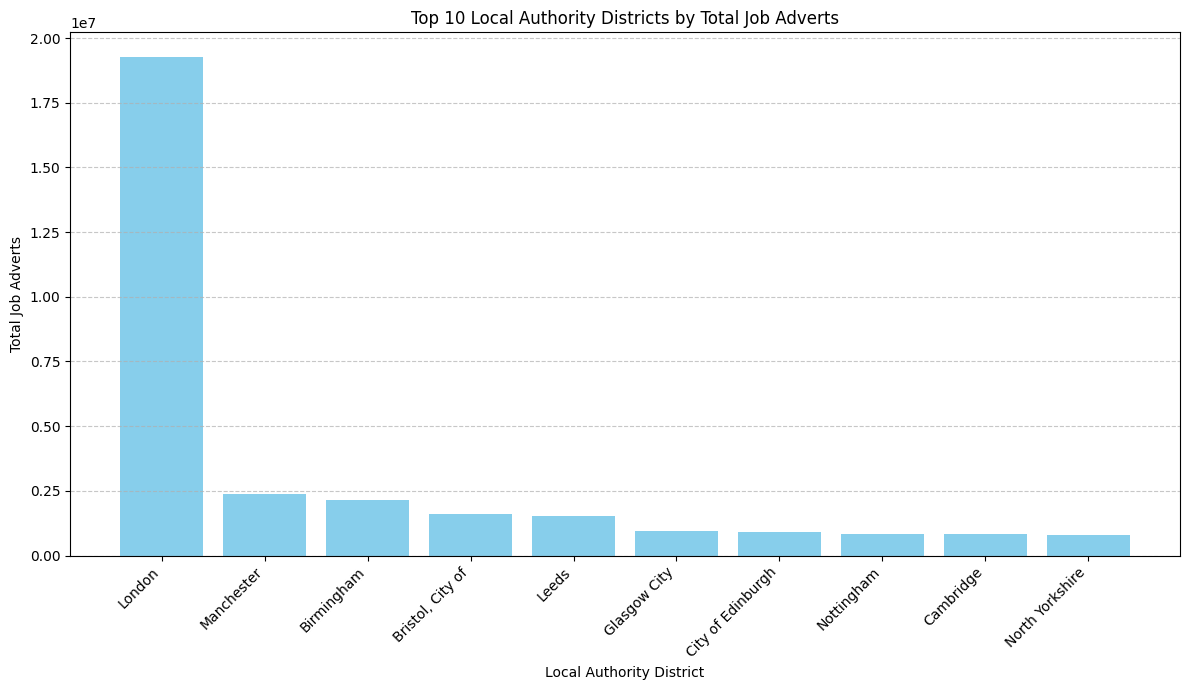

In [52]:
import matplotlib.pyplot as plt

# Identify time-series columns by their index after column name transformation
time_series_cols_df2 = df_table2.columns[4:]

# Calculate the sum of job adverts for each Local Authority District
df_table2['total_adverts'] = df_table2[time_series_cols_df2].sum(axis=1)

# Sort by 'total_adverts' in descending order and select the top 10
top_10_districts = df_table2.sort_values(by='total_adverts', ascending=False).head(10)

print("Top 10 Local Authority Districts by Total Job Adverts:")
print(top_10_districts[['Local Authority District', 'total_adverts']])

# Create a bar chart for the top 10 districts
plt.figure(figsize=(12, 7))
plt.bar(top_10_districts['Local Authority District'], top_10_districts['total_adverts'], color='skyblue')
plt.title('Top 10 Local Authority Districts by Total Job Adverts')
plt.xlabel('Local Authority District')
plt.ylabel('Total Job Adverts')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Identify High-Demand Occupations (Job Demand & High-Growth Roles)



/tmp/ipython-input-2222093441.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_table3['total_adverts'] = df_table3[time_series_cols_df3].sum(axis=1)


Top 10 4-digit SOC Occupations by Total Job Adverts:
SOC 4 digit label
Programmers and software development professionals    5284905.0
Care workers and home carers                          4207899.0
Book-keepers, payroll managers and wages clerks       3819743.0
Sales accounts and business development managers      3714855.0
Other registered nursing professionals                3021101.0
Business sales executives                             2993740.0
Other administrative occupations n.e.c.               2971234.0
IT user support technicians                           2751036.0
Customer service occupations n.e.c.                   2592539.0
Warehouse operatives                                  2401480.0
Name: total_adverts, dtype: float64


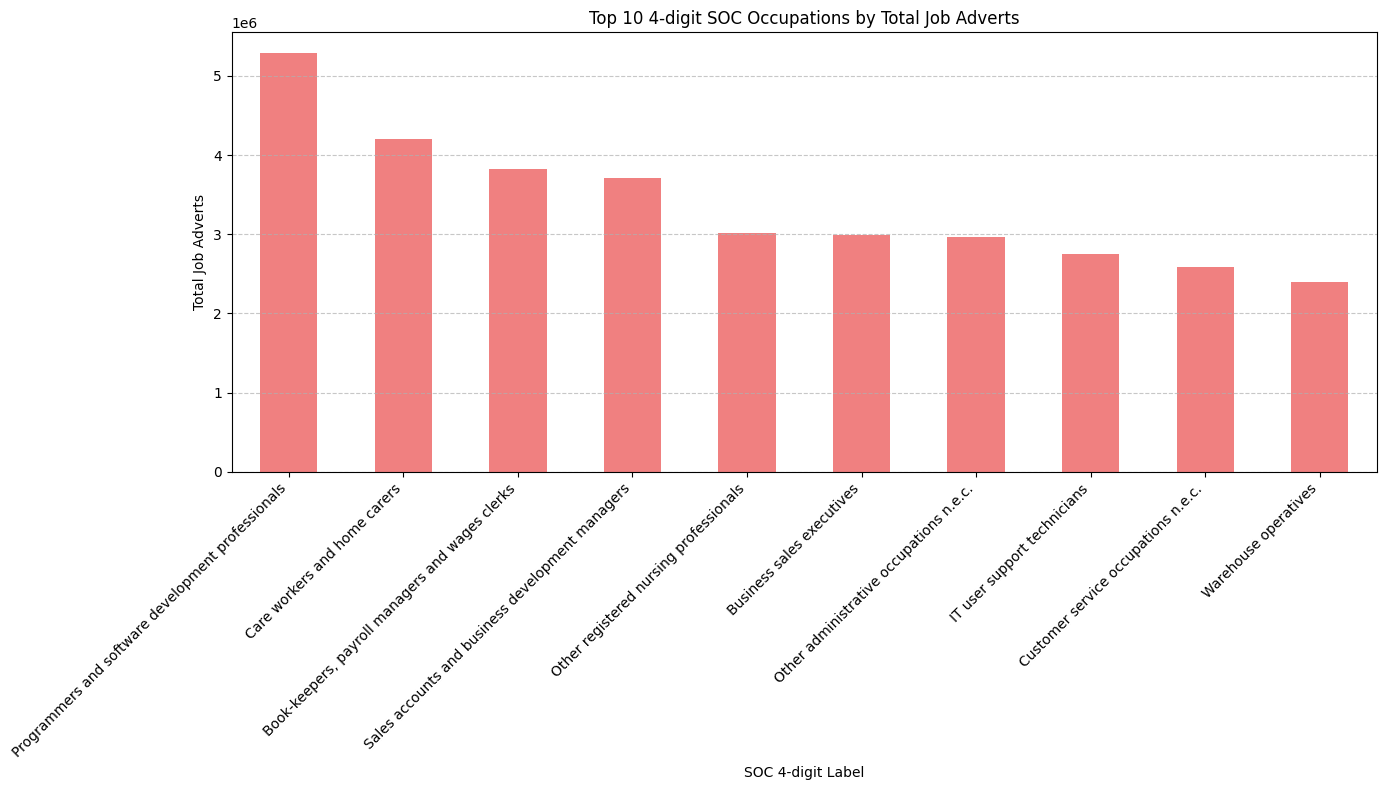

In [53]:
import matplotlib.pyplot as plt

# For df_table3
# Identify time-series columns (datetime objects, starting from the 4th column)
time_series_cols_df3 = df_table3.columns[3:]

# Calculate the sum of job adverts for each row
df_table3['total_adverts'] = df_table3[time_series_cols_df3].sum(axis=1)

# Group by 'SOC 4 digit label' and sum the total adverts, then select the top 10
top_10_soc4 = df_table3.groupby('SOC 4 digit label')['total_adverts'].sum().nlargest(10)

print("Top 10 4-digit SOC Occupations by Total Job Adverts:")
print(top_10_soc4)

# Create a bar chart for the top 10 4-digit SOC occupations
plt.figure(figsize=(14, 8))
top_10_soc4.plot(kind='bar', color='lightcoral')
plt.title('Top 10 4-digit SOC Occupations by Total Job Adverts')
plt.xlabel('SOC 4-digit Label')
plt.ylabel('Total Job Adverts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Top 10 3-digit SOC Occupations by Total Job Adverts:
SOC 3 digit label
Information Technology Professionals                                  5571859.0
Sales, Marketing and Related Associate Professionals                  5160343.0
Caring Personal Services                                              4052637.0
Administrative Occupations: Finance                                   2992143.0
Teaching Professionals                                                2618407.0
Nursing Professionals                                                 2497288.0
Other Elementary Services Occupations                                 2407676.0
HR, Training and Other Vocational Associate Guidance Professionals    2349716.0
Functional Managers and Directors                                     2323231.0
Teaching and Childcare Support Occupations                            2095217.0
Name: total_adverts, dtype: float64


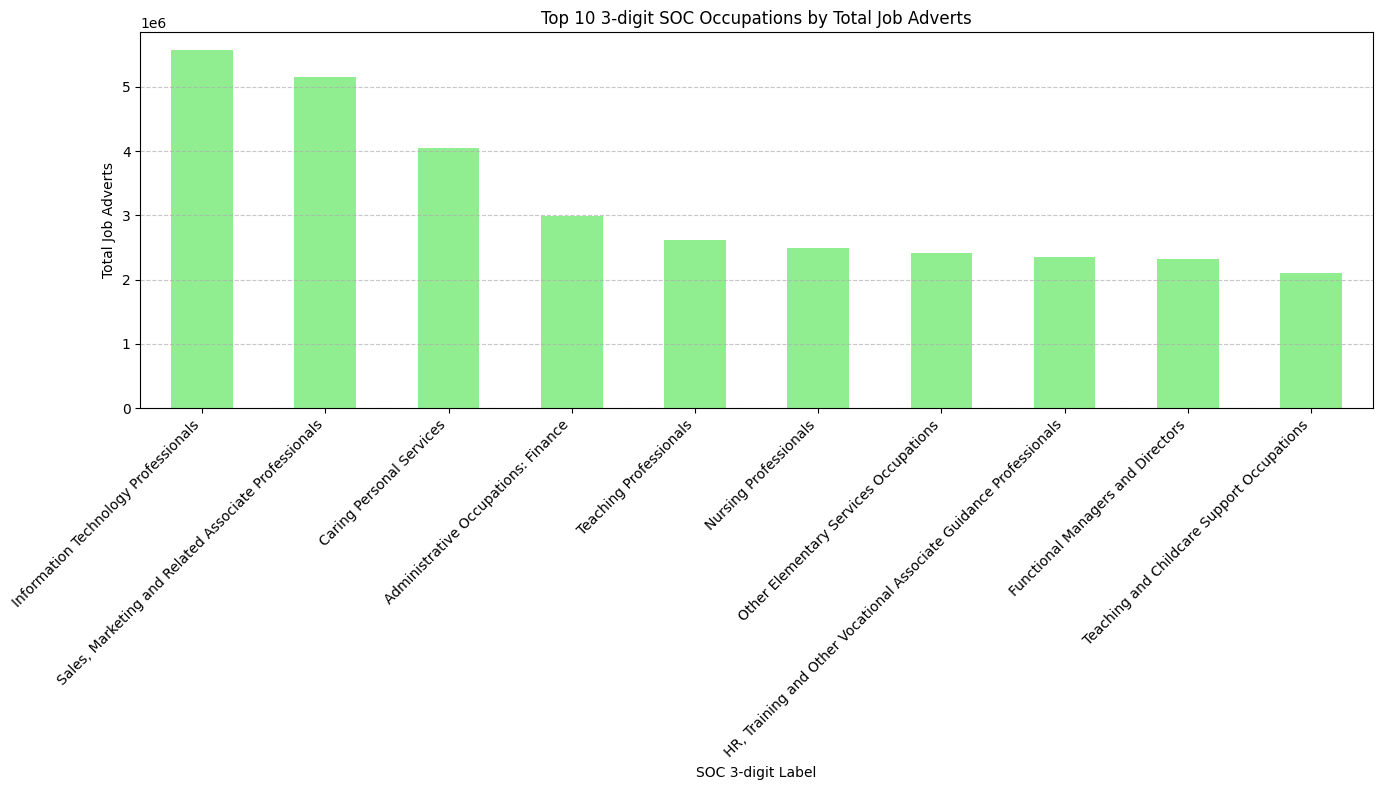

In [55]:
import matplotlib.pyplot as plt

# For df_table4
# Create a copy to avoid DataFrame fragmentation warning
df_table4_copy = df_table4.copy()

# Identify time-series columns (datetime objects, starting from the 7th column)
time_series_cols_df4 = df_table4_copy.columns[6:]

# Calculate the sum of job adverts for each row
df_table4_copy['total_adverts'] = df_table4_copy[time_series_cols_df4].sum(axis=1)

# Group by 'SOC 3 digit label' and sum the total adverts, then select the top 10
top_10_soc3 = df_table4_copy.groupby('SOC 3 digit label', observed=False)['total_adverts'].sum().nlargest(10)

print("Top 10 3-digit SOC Occupations by Total Job Adverts:")
print(top_10_soc3)

# Create a bar chart for the top 10 3-digit SOC occupations
plt.figure(figsize=(14, 8))
top_10_soc3.plot(kind='bar', color='lightgreen')
plt.title('Top 10 3-digit SOC Occupations by Total Job Adverts')
plt.xlabel('SOC 3-digit Label')
plt.ylabel('Total Job Adverts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze Job Growth and Decline Rates


df_table3_copy head with new columns:
                                   SOC 4 digit label  total_adverts_2017  \
0              Chief executives and senior officials                9208   
1               Elected officers and representatives                7448   
2  Production managers and directors in manufactu...               60822   
3  Production managers and directors in construction               51986   
4  Production managers and directors in mining an...                2123   

   total_adverts_2024  growth_rate  
0                6570   -28.649001  
1                5632   -24.382385  
2               44617   -26.643320  
3               36240   -30.288924  
4                1142   -46.208196  

Top 10 Growing SOC 4-digit Occupations:
SOC 4 digit label
Veterinarians                                                  431.466553
Veterinary nurses                                              329.711470
Boat and ship builders and repairers                           248.583473
Co

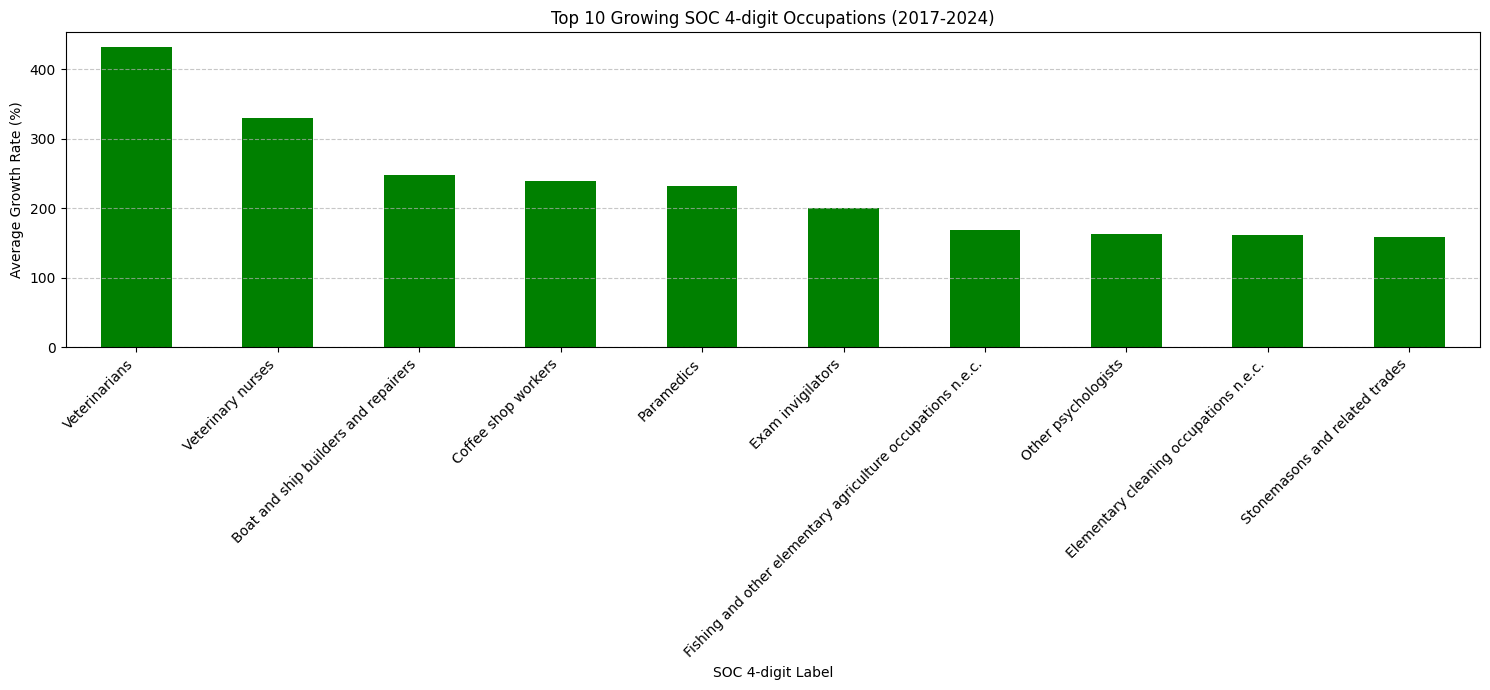

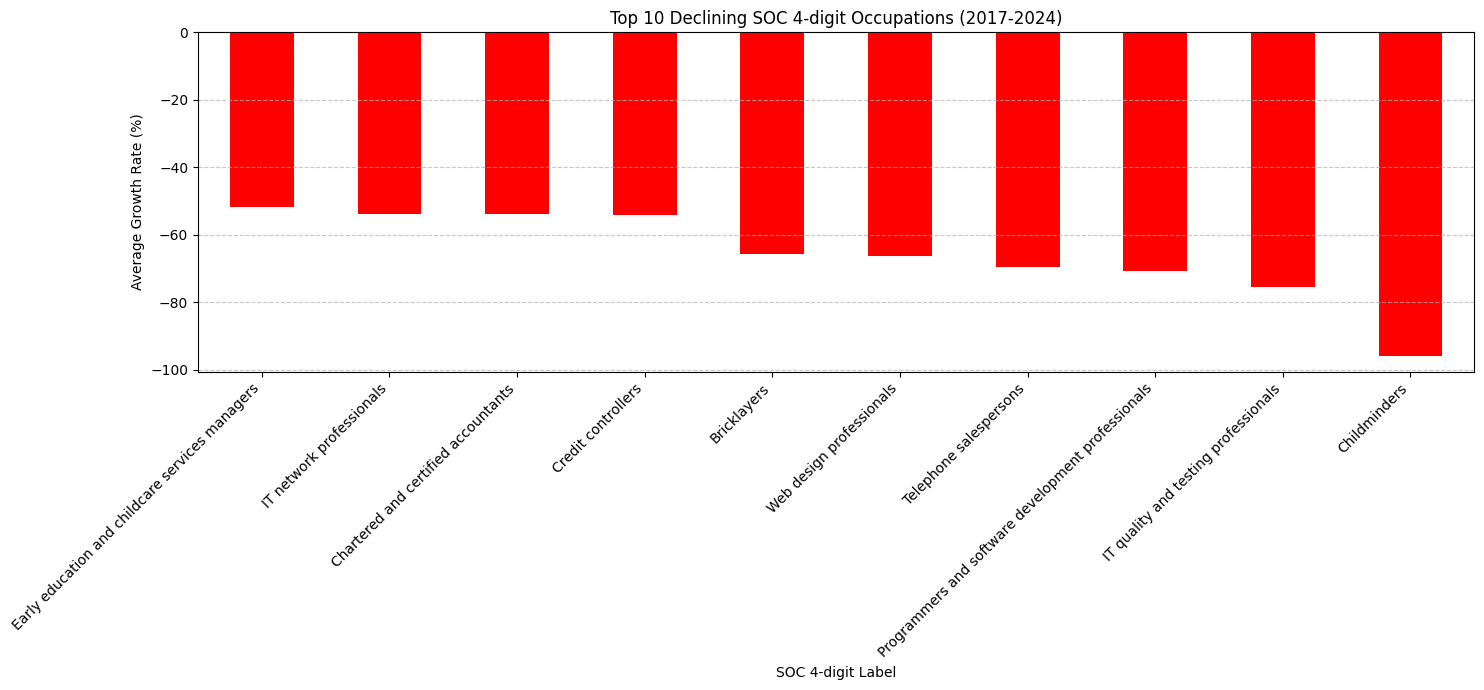

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# --- Process df_table3 (SOC 4-digit occupations) ---

# Create a copy to avoid DataFrame fragmentation warning
df_table3_copy = df_table3.copy()

# 1a. Identify time-series columns (datetime objects)
time_cols_df3 = df_table3_copy.columns[3:][df_table3_copy.columns[3:].map(lambda x: isinstance(x, pd.Timestamp))]

# 1b. Create lists of columns for 2017 and 2024
year_2017_cols_df3 = [col for col in time_cols_df3 if col.year == 2017]
year_2024_cols_df3 = [col for col in time_cols_df3 if col.year == 2024]

# 1c & 1d. Sum job adverts for 2017 and 2024
df_table3_copy['total_adverts_2017'] = df_table3_copy[year_2017_cols_df3].sum(axis=1)
df_table3_copy['total_adverts_2024'] = df_table3_copy[year_2024_cols_df3].sum(axis=1)

# 1e. Calculate the percentage growth rate
# Handle division by zero/NaN: if 2017 is 0 or NaN, growth rate is NaN
def calculate_growth(row):
    total_2017 = row['total_adverts_2017']
    total_2024 = row['total_adverts_2024']
    if pd.isna(total_2017) or total_2017 == 0:
        return np.nan
    return ((total_2024 - total_2017) / total_2017) * 100

df_table3_copy['growth_rate'] = df_table3_copy.apply(calculate_growth, axis=1)

print("df_table3_copy head with new columns:")
print(df_table3_copy[['SOC 4 digit label', 'total_adverts_2017', 'total_adverts_2024', 'growth_rate']].head())

# 1f. Group by 'SOC 4 digit label' and calculate the mean growth rate
mean_growth_rate_soc4 = df_table3_copy.groupby('SOC 4 digit label', observed=False)['growth_rate'].mean().sort_values(ascending=False)

# 1g. Identify the top 10 growing and top 10 declining occupations
top_10_growing_soc4 = mean_growth_rate_soc4.head(10)
top_10_declining_soc4 = mean_growth_rate_soc4.tail(10)

print("\nTop 10 Growing SOC 4-digit Occupations:")
print(top_10_growing_soc4)
print("\nTop 10 Declining SOC 4-digit Occupations:")
print(top_10_declining_soc4)

# 1h. Create bar charts for growing and declining occupations
plt.figure(figsize=(15, 7))
top_10_growing_soc4.plot(kind='bar', color='green')
plt.title('Top 10 Growing SOC 4-digit Occupations (2017-2024)')
plt.xlabel('SOC 4-digit Label')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
top_10_declining_soc4.plot(kind='bar', color='red')
plt.title('Top 10 Declining SOC 4-digit Occupations (2017-2024)')
plt.xlabel('SOC 4-digit Label')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

df_table4_copy head with new columns:
                                   SOC 3 digit label  total_adverts_2017  \
0              Chief Executives and Senior Officials                  23   
1                  Production Managers and Directors                 100   
2                  Functional Managers and Directors                 149   
3  Directors in Logistics, Warehousing and Transport                   0   
4     Managers and Directors in Retail and Wholesale                  28   

   total_adverts_2024  growth_rate  
0                  16   -30.434783  
1                 102     2.000000  
2                 157     5.369128  
3                   0          NaN  
4                  24   -14.285714  

Top 10 Growing SOC 3-digit Occupations:
SOC 3 digit label
Veterinarians                                     831.868131
Veterinary nurses                                 598.288935
Teaching and Childcare Associate Professionals    242.095724
Therapy Professionals                    

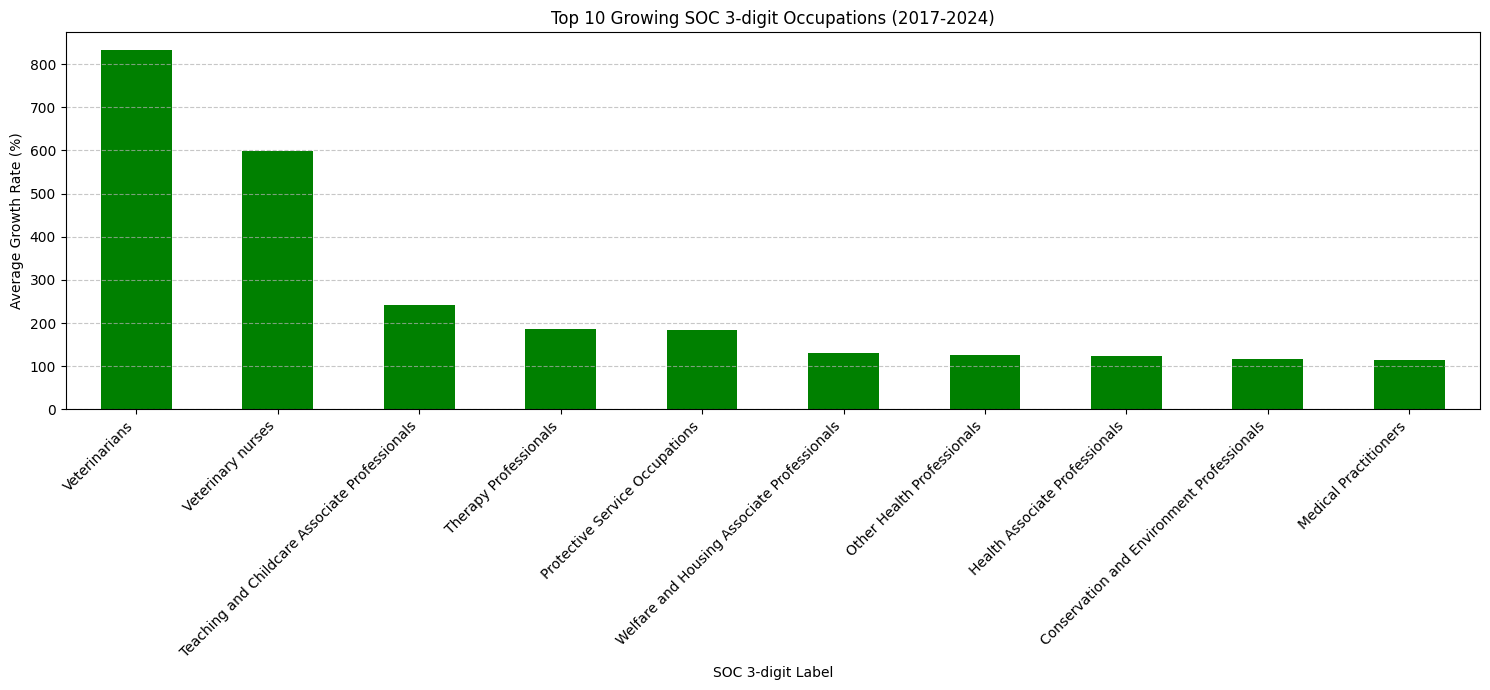

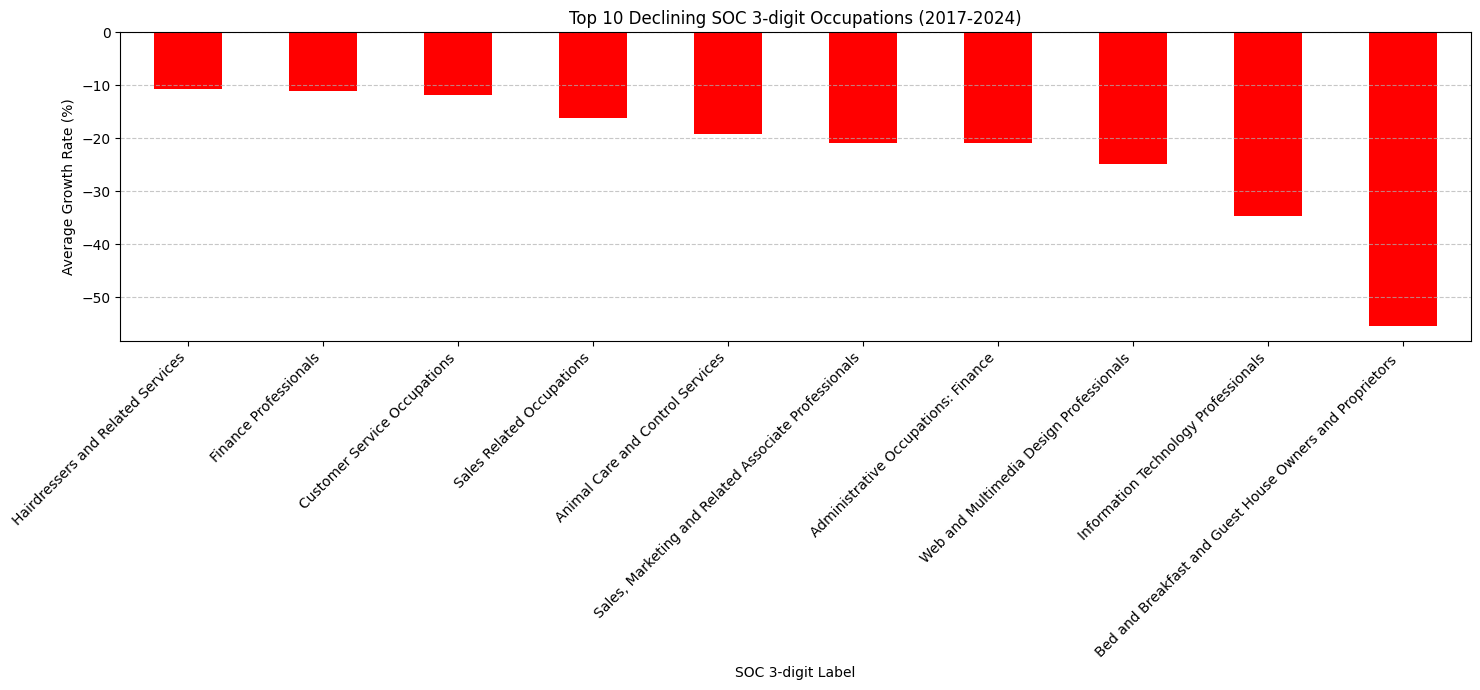

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# --- Process df_table4 (SOC 3-digit occupations) ---

# Create a copy to avoid DataFrame fragmentation warning
df_table4_copy = df_table4.copy()

# 2a. Identify time-series columns (datetime objects, starting from the 7th column, index 6)
time_cols_df4 = df_table4_copy.columns[6:][df_table4_copy.columns[6:].map(lambda x: isinstance(x, pd.Timestamp))]

# 2b. Create lists of columns for 2017 and 2024
year_2017_cols_df4 = [col for col in time_cols_df4 if col.year == 2017]
year_2024_cols_df4 = [col for col in time_cols_df4 if col.year == 2024]

# 2c & 2d. Sum job adverts for 2017 and 2024
df_table4_copy['total_adverts_2017'] = df_table4_copy[year_2017_cols_df4].sum(axis=1)
df_table4_copy['total_adverts_2024'] = df_table4_copy[year_2024_cols_df4].sum(axis=1)

# 2e. Calculate the percentage growth rate
def calculate_growth(row):
    total_2017 = row['total_adverts_2017']
    total_2024 = row['total_adverts_2024']
    if pd.isna(total_2017) or total_2017 == 0:
        return np.nan
    return ((total_2024 - total_2017) / total_2017) * 100

df_table4_copy['growth_rate'] = df_table4_copy.apply(calculate_growth, axis=1)

print("df_table4_copy head with new columns:")
print(df_table4_copy[['SOC 3 digit label', 'total_adverts_2017', 'total_adverts_2024', 'growth_rate']].head())

# 2f. Group by 'SOC 3 digit label' and calculate the mean growth rate
mean_growth_rate_soc3 = df_table4_copy.groupby('SOC 3 digit label', observed=False)['growth_rate'].mean().sort_values(ascending=False)

# 2g. Identify the top 10 growing and top 10 declining occupations
top_10_growing_soc3 = mean_growth_rate_soc3.head(10)
top_10_declining_soc3 = mean_growth_rate_soc3.tail(10)

print("\nTop 10 Growing SOC 3-digit Occupations:")
print(top_10_growing_soc3)
print("\nTop 10 Declining SOC 3-digit Occupations:")
print(top_10_declining_soc3)

# 2h. Create bar charts for growing and declining occupations
plt.figure(figsize=(15, 7))
top_10_growing_soc3.plot(kind='bar', color='green')
plt.title('Top 10 Growing SOC 3-digit Occupations (2017-2024)')
plt.xlabel('SOC 3-digit Label')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
top_10_declining_soc3.plot(kind='bar', color='red')
plt.title('Top 10 Declining SOC 3-digit Occupations (2017-2024)')
plt.xlabel('SOC 3-digit Label')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

df_table5_copy head with new columns:
                                   SOC 4 digit label  total_adverts_2017  \
0              Chief executives and senior officials                   0   
1               Elected officers and representatives                  23   
2  Production managers and directors in manufactu...                  71   
3  Production managers and directors in construction                  27   
4  Production managers and directors in mining an...                   2   

   total_adverts_2024  growth_rate  
0                   2          NaN  
1                  14   -39.130435  
2                  70    -1.408451  
3                  31    14.814815  
4                   1   -50.000000  

Top 10 Growing SOC 4-digit Occupations (df_table5):
SOC 4 digit label
Veterinarians                                                  831.868131
Veterinary nurses                                              598.288935
Coffee shop workers                                            5

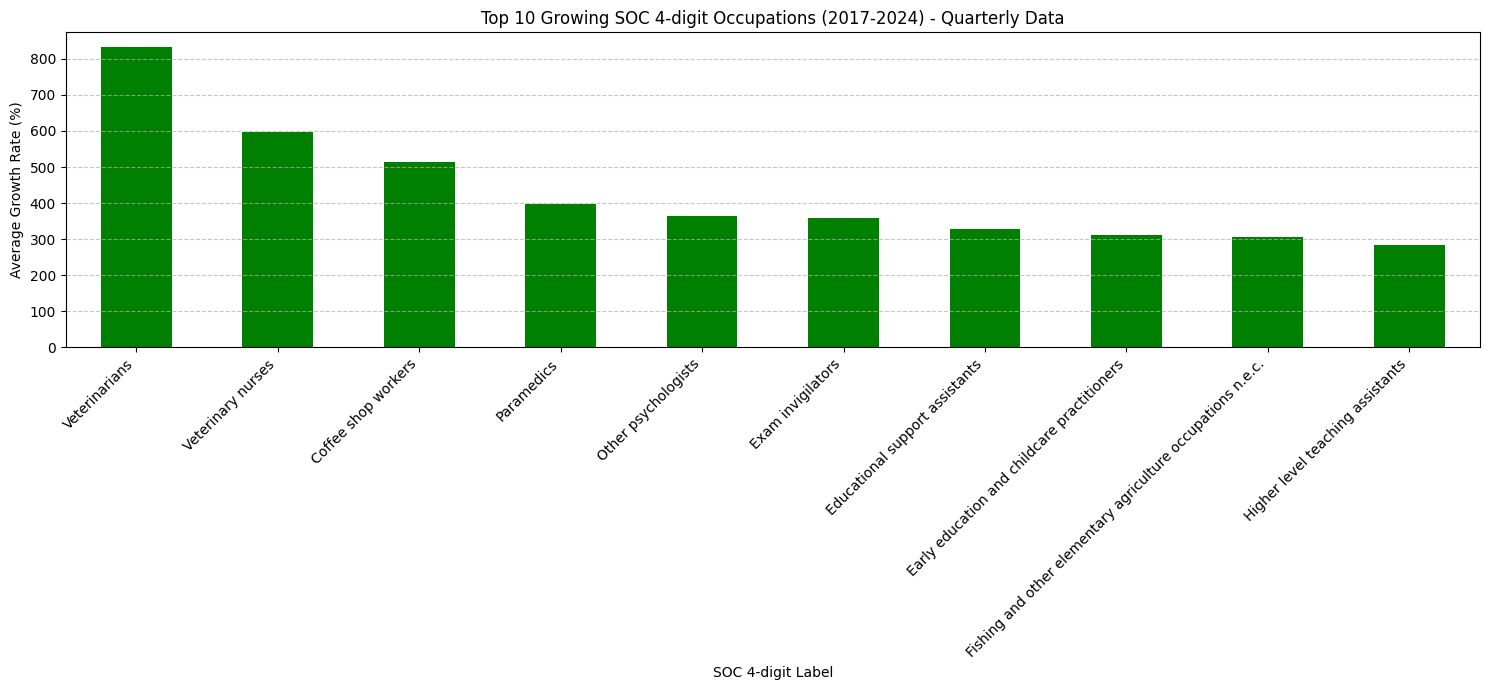

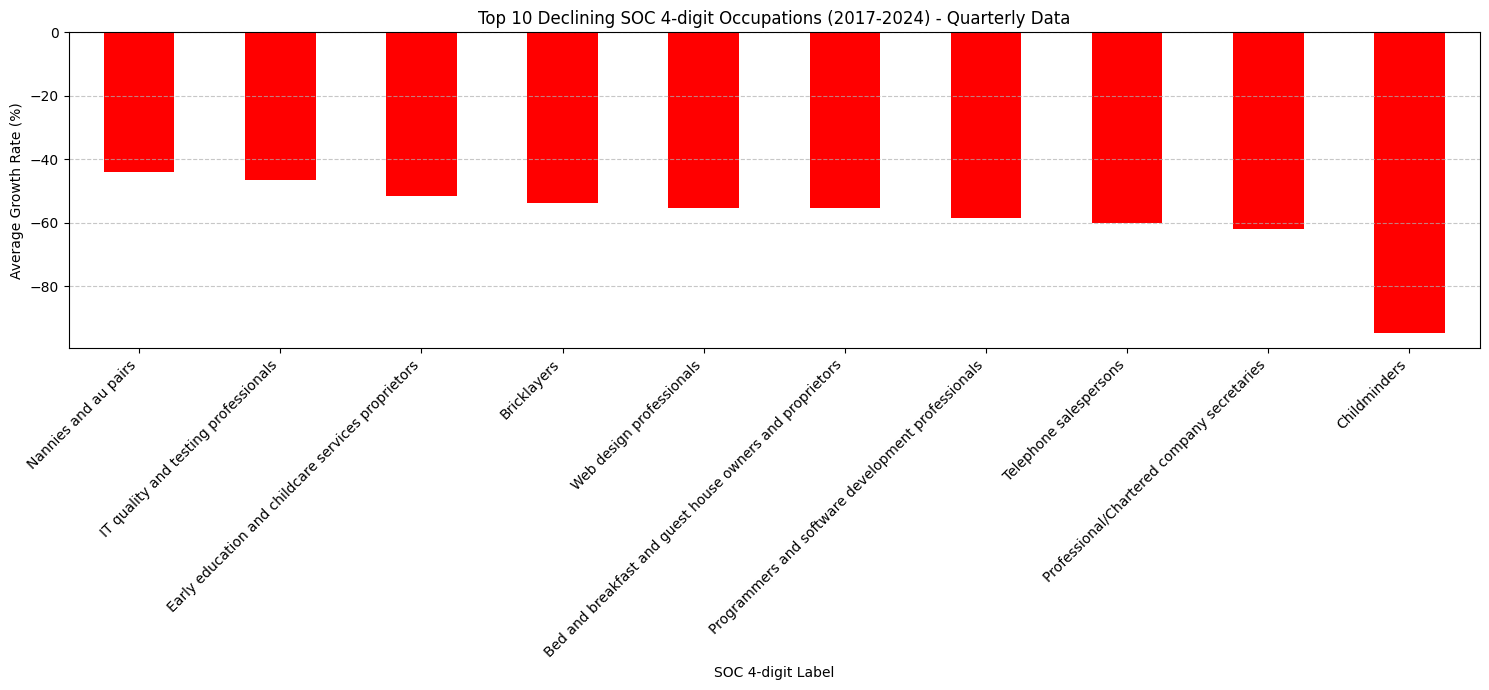

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# --- Process df_table5 (quarterly data) ---

# Create a copy to avoid DataFrame fragmentation warning
df_table5_copy = df_table5.copy()

# 3a. Identify time-series columns (datetime objects, starting from the 7th column, index 6)
time_cols_df5 = df_table5_copy.columns[6:][df_table5_copy.columns[6:].map(lambda x: isinstance(x, pd.Timestamp))]

# 3b. Create lists of columns for 2017 and 2024
year_2017_cols_df5 = [col for col in time_cols_df5 if col.year == 2017]
year_2024_cols_df5 = [col for col in time_cols_df5 if col.year == 2024]

# 3c & 3d. Sum job adverts for 2017 and 2024
df_table5_copy['total_adverts_2017'] = df_table5_copy[year_2017_cols_df5].sum(axis=1)
df_table5_copy['total_adverts_2024'] = df_table5_copy[year_2024_cols_df5].sum(axis=1)

# 3e. Calculate the percentage growth rate
def calculate_growth(row):
    total_2017 = row['total_adverts_2017']
    total_2024 = row['total_adverts_2024']
    if pd.isna(total_2017) or total_2017 == 0:
        return np.nan
    return ((total_2024 - total_2017) / total_2017) * 100

df_table5_copy['growth_rate'] = df_table5_copy.apply(calculate_growth, axis=1)

print("df_table5_copy head with new columns:")
print(df_table5_copy[['SOC 4 digit label', 'total_adverts_2017', 'total_adverts_2024', 'growth_rate']].head())

# 3f. Group by 'SOC 4 digit label' and calculate the mean growth rate
mean_growth_rate_soc4_df5 = df_table5_copy.groupby('SOC 4 digit label', observed=False)['growth_rate'].mean().sort_values(ascending=False)

# 3g. Identify the top 10 growing and top 10 declining occupations
top_10_growing_soc4_df5 = mean_growth_rate_soc4_df5.head(10)
top_10_declining_soc4_df5 = mean_growth_rate_soc4_df5.tail(10)

print("\nTop 10 Growing SOC 4-digit Occupations (df_table5):")
print(top_10_growing_soc4_df5)
print("\nTop 10 Declining SOC 4-digit Occupations (df_table5):")
print(top_10_declining_soc4_df5)

# 3h. Create bar charts for growing and declining occupations
plt.figure(figsize=(15, 7))
top_10_growing_soc4_df5.plot(kind='bar', color='green')
plt.title('Top 10 Growing SOC 4-digit Occupations (2017-2024) - Quarterly Data')
plt.xlabel('SOC 4-digit Label')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 7))
top_10_declining_soc4_df5.plot(kind='bar', color='red')
plt.title('Top 10 Declining SOC 4-digit Occupations (2017-2024) - Quarterly Data')
plt.xlabel('SOC 4-digit Label')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary:

### Q&A
*   **What questions could not be answered with the available data?**
    The available data does not allow for answering questions regarding:
    *   Specific skills required for jobs.
    *   Salary information for occupations or regions.
    *   The emergence of new job titles or evolving roles beyond established SOC codes.
    *   Specifics of remote, hybrid, or in-person work opportunities.
    *   Detailed, reliable job growth projections significantly beyond the dataset's end date (November 2025).
    *   The direct impact of AI or automation on job demand.
    *   Educational background of job seekers or workforce demographics.
    *   The underlying causal factors for observed job market trends.

### Data Analysis Key Findings
*   All time-series dataframes (`df_table2`, `df_table3`, `df_table4`, `df_table5`) were successfully processed: monthly/quarterly job advert columns were converted to numeric types, and their column headers were transformed into datetime objects, enabling time-series analysis.
*   Overall UK job demand trends were visualized through line plots for both monthly data (from `df_table1`) and quarterly data (from `df_table5`), providing a clear representation of market fluctuations over time.
*   **London** emerged as the top Local Authority District by total job adverts.
*   "Programmers and software development professionals" led the top 10 4-digit SOC occupations with over 5.2 million adverts, while "Information Technology Professionals" topped the 3-digit SOC occupations with over 5.5 million adverts.
*   Analysis of growth and decline rates between 2017 and 2024 revealed:
    *   **Growing Occupations (across 3-digit and 4-digit SOC codes and quarterly data)**: Included 'Veterinarians', 'Veterinary nurses', 'Coffee shop workers', 'Boat and ship builders and repairers', 'Teaching and Childcare Associate Professionals', 'Therapy Professionals', and 'Paramedics'.
    *   **Declining Occupations (across 3-digit and 4-digit SOC codes and quarterly data)**: Included 'Childminders', 'IT quality and testing professionals', 'Programmers and software development professionals', 'Telephone salespersons', 'Bed and Breakfast and Guest House Owners and Proprietors', 'Information Technology Professionals', 'Web and Multimedia Design Professionals', 'Sales, Marketing and Related Associate Professionals', and 'Professional/Chartered company secretaries'.
*   The dataset is limited to broad occupational codes and job advert counts, lacking granular details on skills, salaries, remote work, or socio-economic factors.

### Insights or Next Steps
*   The job market demonstrates strong demand in specific professional services and healthcare, while certain IT and sales roles show a notable decline, suggesting a shift in demand or increased automation in those areas.
*   To gain deeper insights, future data collection should include information on required skills, salary ranges, and remote work availability to provide a more comprehensive view of the UK job market dynamics.
